In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #fmin_cg to train the linear regression
from sklearn import svm #SVM software

In [2]:
cd C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex6\ex6

C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex6\ex6


In [3]:
data=scipy.io.loadmat('ex6data1.mat')

In [33]:
X,y=data['X'],data['y']

In [34]:
pos=X[np.where(y==1)[0],:]
neg=X[np.where(y==0)[0],:]

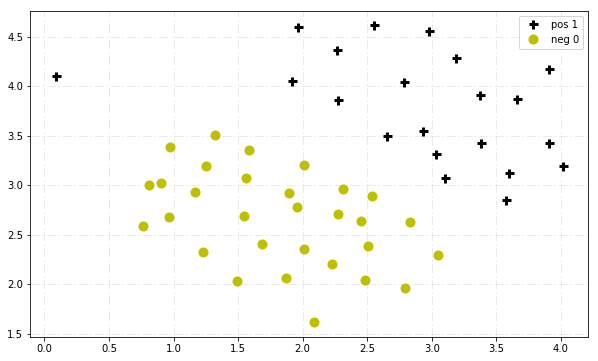

In [6]:
def plotData():
    plt.plot(pos[:,0],pos[:,1],'k+',markersize=9,markeredgewidth=3,label='pos 1')
    plt.plot(neg[:,0],neg[:,1],'yo',markersize=9,label='neg 0')
    plt.legend()
    plt.grid(linestyle='-.',alpha=0.3)

plt.figure(figsize=(10,6))
plotData()

In [35]:
def plotBoundary(my_svm,xmin,xmax,ymin,ymax):
    x=np.linspace(xmin,xmax,100)
    y=np.linspace(ymin,ymax,100)
    z=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            z[i,j]=float(my_svm.predict([[x[i],y[j]]]))
    z=z.T
    my_contour=plt.contour(x,y,z,[0])

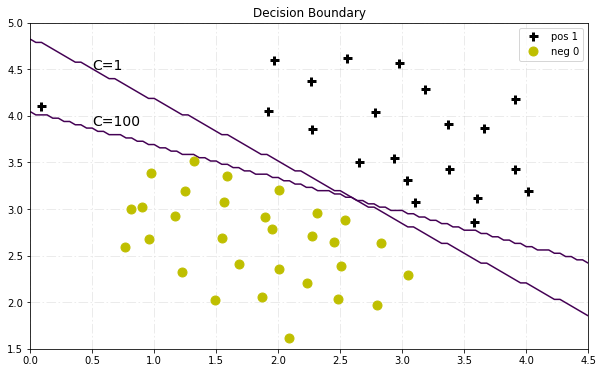

In [36]:
plt.figure(figsize=(10,6))
plotData()
plotBoundary(svm.SVC(C=1,kernel='linear').fit(X,y.flatten()),0,4.5,1.5,5)
plotBoundary(svm.SVC(C=100,kernel='linear').fit(X,y.flatten()),0,4.5,1.5,5)
plt.text(0.5,4.5,'C=1',fontsize=14)
plt.text(0.5,3.9,'C=100',fontsize=14)
plt.title('Decision Boundary')

In [9]:
def plotsuppvec(C,ker):
    fit=svm.SVC(C,kernel=ker).fit(X,y.flatten())
    supp=fit.support_vectors_
    ind=[]
    for i in range(len(supp)):
        for j in range(len(X)):
            if (supp[i]==X[j]).all():
                ind.append(j)
    ind.sort()
    plotData()
    plt.plot(X[ind,0],X[ind,1],'rx',markersize=7,markeredgewidth=2)
    plotBoundary(svm.SVC(C,kernel=ker).fit(X,y.flatten()),0,4.5,1.5,5)
    plt.title('Decision Boundary (C=%s)' % C)

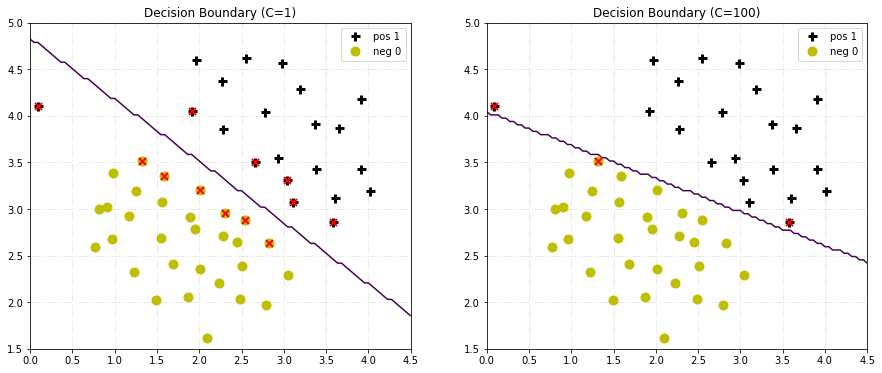

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plotsuppvec(1,'linear')

plt.subplot(122)
plotsuppvec(100,'linear')

In [11]:
def gaussKernel(x1,x2,sigma):
    temp=(x1-x2).T.dot(x1-x2)
    return np.exp(-temp/2/sigma**2)

In [12]:
gaussKernel(np.array([1, 2, 1]),np.array([0, 4, -1]), 2)

0.32465246735834974

In [13]:
data1=scipy.io.loadmat('ex6data2.mat')
X,y=data1['X'],data1['y']
pos=X[np.where(y==1)[0],:]
neg=X[np.where(y==0)[0],:]

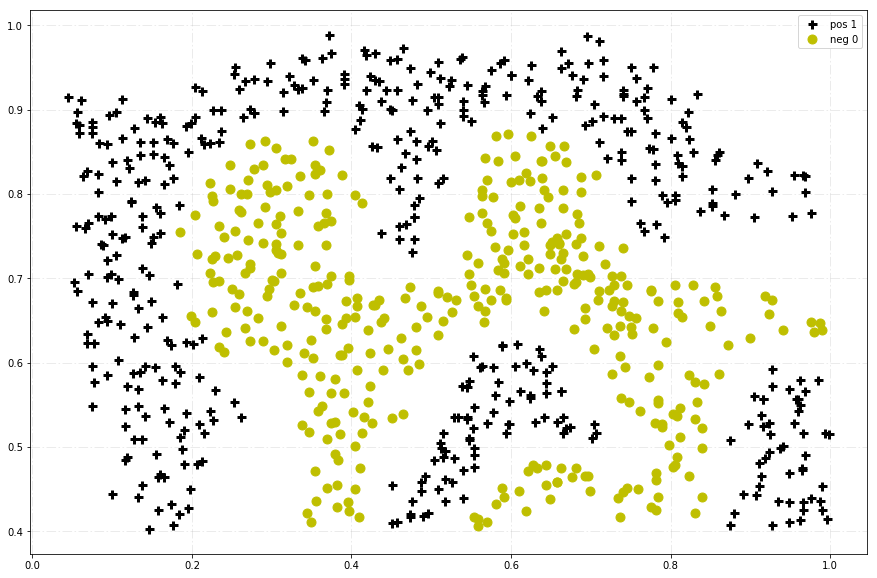

In [14]:
plt.figure(figsize=(15,10))
plotData()

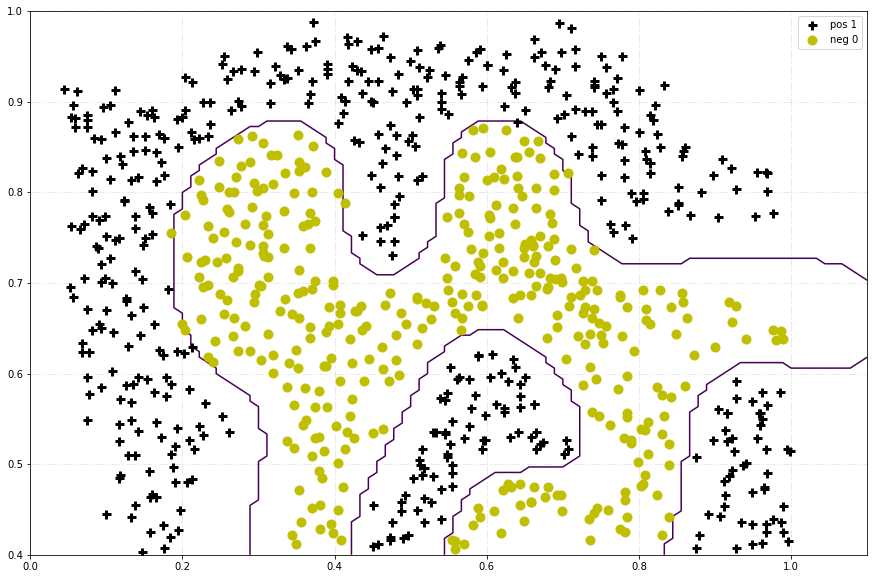

In [15]:
sigma=0.1
plt.figure(figsize=(15,10))
plotData()
plotBoundary(svm.SVC(C=1,kernel='rbf',gamma=sigma**(-2)).fit(X,y.flatten()),0,1.1,0.4,1)

In [16]:
data2=scipy.io.loadmat('ex6data3.mat')
X,y=data2['X'],data2['y']
Xval,yval=data2['Xval'],data2['yval']
pos=X[np.where(y==1)[0],:]
neg=X[np.where(y==0)[0],:]

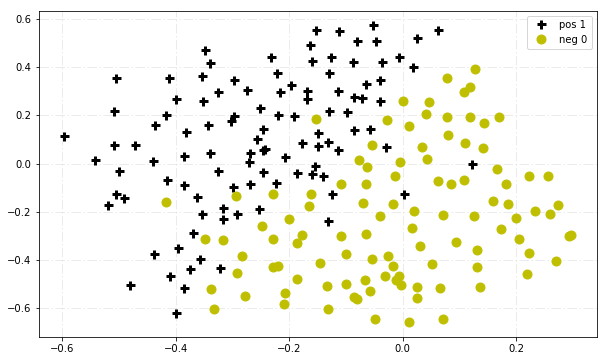

In [17]:
plt.figure(figsize=(10,6))
plotData()

## Use validation set to determine the best C and sigma to use

In [18]:
def testerr(xval,yval):
    ran=np.array([0.01,0.03,0.1,0.3,1,3,10,30])
    accuracy,score=[],[]
    n=yval.size
    for i in range(len(ran)):
        for j in range(len(ran)):
            fit=svm.SVC(C=ran[i],kernel='rbf',gamma=ran[j]**(-2)).fit(X,y.flatten())
            pred=fit.predict(Xval)
            pred=pred.reshape((n,1))
            score.append(float(fit.score(xval,yval)))
            accuracy.append((float(sum(pred==yval))/n,float(ran[i]),float(ran[j])))
    return score,accuracy

In [19]:
score,acc=testerr(Xval,yval)
score==[li[0] for li in acc]

True

In [22]:
maxvalue=acc[np.argmax([li[0] for li in acc])]
print('Best C and sigma pair is (%s,%s), the accuracy is %s' % (maxvalue[1],maxvalue[2],maxvalue[0]))

Best C and sigma pair is (0.3,0.1), the accuracy is 0.965


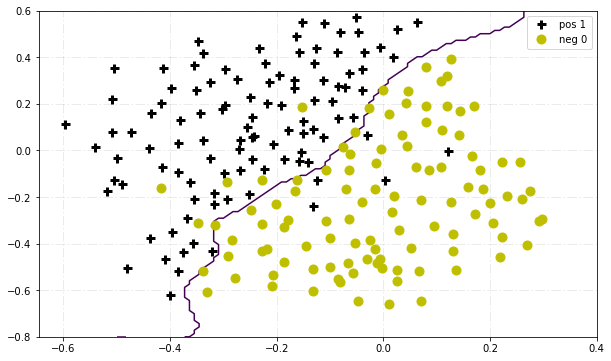

In [23]:
plt.figure(figsize=(10,6))
plotData()
plotBoundary(svm.SVC(C=0.3,kernel='rbf',gamma=0.1**(-2)).fit(X,y.flatten()),-0.5,0.4,-0.8,0.6)